<a href="https://colab.research.google.com/github/1804054Miraz/My_Thesis_Work/blob/main/ML_apply_in_on_Gamma_Beta_and_KatzFD_Band_with_full_channels_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import numpy as np
import os
import pandas as pd
import statistics as st
import scipy.stats as scst
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy
from scipy.stats import normaltest
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
from sklearn.ensemble import BaggingClassifier

In [ ]:
path = '/content/drive/MyDrive/Dataset/Features/merged_beta_gamma_a_c.csv'
merged_beta_gamma_a_c = pd.read_csv(path)
# merged_beta_gamma_a_c=merged_beta_gamma_a_c.drop(columns=['X_PS','X_PS_2','Y_PS','Y_PS_2','nd_PS', 'nd_PS_2'], axis=False)
merged_beta_gamma_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,PO8_PS_2,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,31.407003,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,31.837468,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,39.507001,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,30.478540,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,55.854653,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,5.024580,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,3.040292,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,2.070562,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,normal
7620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal


In [ ]:
merged_beta_gamma_a_c = merged_beta_gamma_a_c.drop(7620)
merged_beta_gamma_a_c = merged_beta_gamma_a_c.reset_index(drop=True)
merged_beta_gamma_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,PO8_PS_2,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,31.407003,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,31.837468,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,39.507001,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,30.478540,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,55.854653,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,28.486375,39.398962,72.987461,28.648872,26.222865,31.824731,32.457546,31.413086,28.013546,28.027574,...,2.408939,0.174153,0.867184,1.234990,0.535141,0.633024,0.261792,1.058754,6.116856,normal
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,5.024580,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,3.040292,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,2.070562,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,normal


In [ ]:
merged_beta_gamma_a_c = merged_beta_gamma_a_c.replace(0, merged_beta_gamma_a_c.mean(numeric_only=True))

In [ ]:
merged_beta_gamma_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,PO8_PS_2,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,31.407003,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,31.837468,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,39.507001,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,30.478540,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,55.854653,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,28.486375,39.398962,72.987461,28.648872,26.222865,31.824731,32.457546,31.413086,28.013546,28.027574,...,2.408939,0.174153,0.867184,1.234990,0.535141,0.633024,0.261792,1.058754,6.116856,normal
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,5.024580,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,3.040292,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,2.070562,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,normal


In [ ]:
# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_a_c.iloc[:, :-1]
y = merged_beta_gamma_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Support Vector Machine (SVM)
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_predictions = cross_val_predict(svm_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
svm_accuracy = accuracy_score(y_encoded, svm_predictions)
svm_precision = precision_score(y_encoded, svm_predictions)
svm_recall = recall_score(y_encoded, svm_predictions)
svm_f1 = f1_score(y_encoded, svm_predictions)
svm_processing_time = time.time() - start_time

print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Processing Time:", svm_processing_time)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
rf_accuracy = accuracy_score(y_encoded, rf_predictions)
rf_precision = precision_score(y_encoded, rf_predictions)
rf_recall = recall_score(y_encoded, rf_predictions)
rf_f1 = f1_score(y_encoded, rf_predictions)
rf_processing_time = time.time() - start_time

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Processing Time:", rf_processing_time)


# Ensemble Subspace of k-Nearest Neighbors
start_time_ensemble_knn = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
ensemble_knn_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)

ensemble_knn_scores = cross_val_predict(ensemble_knn_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
ensemble_knn_accuracy = accuracy_score(y_encoded, ensemble_knn_scores)
ensemble_knn_precision = precision_score(y_encoded, ensemble_knn_scores)
ensemble_knn_recall = recall_score(y_encoded, ensemble_knn_scores)
ensemble_knn_f1 = f1_score(y_encoded, ensemble_knn_scores)
ensemble_knn_processing_time = time.time() - start_time_ensemble_knn

print("\nEnsemble Subspace of k-Nearest Neighbors Metrics:")
print("Accuracy:", ensemble_knn_accuracy)
print("Precision:", ensemble_knn_precision)
print("Recall:", ensemble_knn_recall)
print("F1 Score:", ensemble_knn_f1)
print("Processing Time:", ensemble_knn_processing_time)

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array
X_np = X.values
X_np = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

# 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Create and fit LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predictions
    y_pred_probs = lstm_model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("\nLSTM Metrics:")
print("LSTM Model Accuracy:", np.mean(accuracy_scores))
print("LSTM Model Precision:", np.mean(precision_scores))
print("LSTM Model Recall:", np.mean(recall_scores))
print("LSTM Model F1 Score:", np.mean(f1_scores))

SVM Metrics:
Accuracy: 0.8874163495604251
Precision: 0.9075096631695196
Recall: 0.862729658792651
F1 Score: 0.8845532831001076
Processing Time: 35.37226986885071

XGBoost Metrics:
Accuracy: 0.9572234614879938
Precision: 0.9505949301603724
Recall: 0.9645669291338582
F1 Score: 0.957529963522668
Processing Time: 47.43141531944275

Random Forest Metrics:
Accuracy: 0.9231072037790317
Precision: 0.9197916666666667
Recall: 0.9270341207349081
F1 Score: 0.9233986928104575
Processing Time: 92.79900741577148


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Ensemble Subspace of k-Nearest Neighbors Metrics:
Accuracy: 0.898438525127936
Precision: 0.8912371134020619
Recall: 0.9076115485564304
F1 Score: 0.8993498049414824
Processing Time: 13.379350662231445
24/24 [==============================] - 0s 2ms/step

LSTM Metrics:
LSTM Model Accuracy: 0.846476816544721
LSTM Model Precision: 0.8556121473852265
LSTM Model Recall: 0.8380261007306249
LSTM Model F1 Score: 0.8448194000617194



XGBoost Metrics:
Accuracy: 0.9607714510627132
Precision: 0.9580073030777256
Recall: 0.9637890317501968
F1 Score: 0.9608894702419883
Processing Time: 67.4925422668457

Confusion Matrix:
[[3650  161]
 [ 138 3673]]


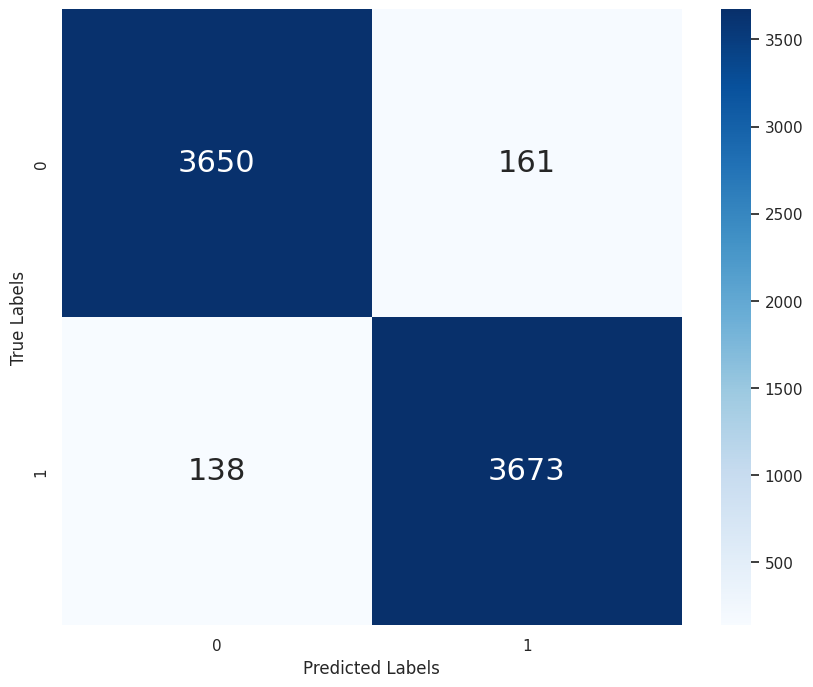

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_a_c.iloc[:, :-1]
y = merged_beta_gamma_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

# Confusion Matrix
xgb_confusion_matrix = confusion_matrix(y_encoded, xgb_predictions)

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)
print("\nConfusion Matrix:")
print(xgb_confusion_matrix)

# Create a heatmap of the confusion matrix with a diverging color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)  # Adjust font size
sns.heatmap(xgb_confusion_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 22})

# plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Dataset/Features/Katz_Fd_Features_a_c.csv'
Katz_Fd_Features_a_c = pd.read_csv(path)

path = '/content/drive/MyDrive/Dataset/Features/merged_beta_gamma_a_c.csv'
merged_beta_gamma_a_c = pd.read_csv(path)
# merged_beta_gamma_a_c=merged_beta_gamma_a_c.drop(columns=['X_PS','X_PS_2','Y_PS','Y_PS_2','nd_PS', 'nd_PS_2'], axis=False)


In [ ]:
merged_beta_gamma_katz_a_c = pd.concat([merged_beta_gamma_a_c,Katz_Fd_Features_a_c], axis=1)
merged_beta_gamma_katz_a_c.drop('label', axis=1, inplace=True)
merged_beta_gamma_katz_a_c['label']='normal'
merged_beta_gamma_katz_a_c.loc[0:3810, 'label'] = 'addicted'
merged_beta_gamma_katz_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,FP2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,1.655864,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,1.367933,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,1.584968,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,1.282758,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,1.461674,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,1.538744,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,1.716444,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,1.556286,normal
7620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,normal


In [ ]:
# merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.replace(0, merged_beta_gamma_katz_a_c.mean())
merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.replace(0, merged_beta_gamma_katz_a_c.mean(numeric_only=True))
merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.drop(7620)
merged_beta_gamma_katz_a_c = merged_beta_gamma_katz_a_c.reset_index(drop=True)
merged_beta_gamma_katz_a_c

,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,FC6_PS,...,FCZ_PS_2,POZ_PS_2,OZ_PS_2,P2_PS_2,P1_PS_2,CPZ_PS_2,nd_PS_2,Y_PS_2,FP2,label
0,49.125112,75.401561,55.085147,236.773934,24.574587,34.914910,9.395342,15.433209,21.208462,9.854879,...,0.639929,3.175360,7.257440,1.171091,1.727645,0.303052,5.626485,6.090333,1.655864,addicted
1,31.662543,140.818732,107.251892,299.075377,22.347470,53.286704,9.112230,29.795814,17.161432,20.283656,...,0.481474,1.360249,3.002968,0.452312,0.873387,0.169722,4.693551,3.472028,1.367933,addicted
2,33.981550,119.618734,69.705635,404.815675,24.381613,75.511201,9.212180,28.717643,24.864757,23.216713,...,0.403271,1.391440,2.908869,0.790318,1.077771,0.227142,6.266331,3.612442,1.584968,addicted
3,39.844284,101.587017,85.574482,491.630726,27.440661,55.378706,14.178997,42.917834,23.212199,26.417654,...,0.450695,1.121842,2.162650,0.753562,0.999099,0.180620,4.211706,6.950914,1.282758,addicted
4,51.900094,54.809999,113.999959,336.252881,29.900918,53.569130,11.944623,34.313907,17.342946,30.299428,...,1.011451,3.663678,5.646425,1.918202,2.340282,0.437771,7.413797,7.107321,1.461674,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,28.486375,39.398962,72.987461,28.648872,26.222865,31.824731,32.457546,31.413086,28.013546,28.027574,...,0.174153,0.867184,1.234990,0.535141,0.633024,0.261792,1.058754,6.116856,1.819097,normal
7617,56.398217,64.924927,102.732291,88.351802,48.641285,65.179016,36.246569,81.446588,56.383928,53.427282,...,0.227139,3.721454,4.377724,1.713244,1.729774,0.453551,5.866098,3.061931,1.538744,normal
7618,16.385750,19.103398,36.256479,29.794270,14.541851,18.748430,13.719778,28.332358,13.236784,30.672314,...,0.398802,3.180998,2.880482,2.019003,1.853624,0.785453,2.408728,3.512361,1.716444,normal
7619,53.679662,66.320784,87.491928,83.587297,46.040212,55.310880,36.804056,60.752408,44.290746,36.999455,...,0.132006,1.298873,1.126842,0.855509,0.550932,0.247462,1.363607,3.663259,1.556286,normal


In [ ]:
# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_katz_a_c.iloc[:, :-1]
y = merged_beta_gamma_katz_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Support Vector Machine (SVM)
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_predictions = cross_val_predict(svm_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
svm_accuracy = accuracy_score(y_encoded, svm_predictions)
svm_precision = precision_score(y_encoded, svm_predictions)
svm_recall = recall_score(y_encoded, svm_predictions)
svm_f1 = f1_score(y_encoded, svm_predictions)
svm_processing_time = time.time() - start_time

print("SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Processing Time:", svm_processing_time)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_predictions = cross_val_predict(rf_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
rf_accuracy = accuracy_score(y_encoded, rf_predictions)
rf_precision = precision_score(y_encoded, rf_predictions)
rf_recall = recall_score(y_encoded, rf_predictions)
rf_f1 = f1_score(y_encoded, rf_predictions)
rf_processing_time = time.time() - start_time

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Processing Time:", rf_processing_time)


# Ensemble Subspace of k-Nearest Neighbors
start_time_ensemble_knn = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
ensemble_knn_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)

ensemble_knn_scores = cross_val_predict(ensemble_knn_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
ensemble_knn_accuracy = accuracy_score(y_encoded, ensemble_knn_scores)
ensemble_knn_precision = precision_score(y_encoded, ensemble_knn_scores)
ensemble_knn_recall = recall_score(y_encoded, ensemble_knn_scores)
ensemble_knn_f1 = f1_score(y_encoded, ensemble_knn_scores)
ensemble_knn_processing_time = time.time() - start_time_ensemble_knn

print("\nEnsemble Subspace of k-Nearest Neighbors Metrics:")
print("Accuracy:", ensemble_knn_accuracy)
print("Precision:", ensemble_knn_precision)
print("Recall:", ensemble_knn_recall)
print("F1 Score:", ensemble_knn_f1)
print("Processing Time:", ensemble_knn_processing_time)

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array
X_np = X.values
X_np = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

# 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Create and fit LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predictions
    y_pred_probs = lstm_model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("\nLSTM Metrics:")
print("LSTM Model Accuracy:", np.mean(accuracy_scores))
print("LSTM Model Precision:", np.mean(precision_scores))
print("LSTM Model Recall:", np.mean(recall_scores))
print("LSTM Model F1 Score:", np.mean(f1_scores))

SVM Metrics:
Accuracy: 0.8887285133184621
Precision: 0.9079889807162534
Recall: 0.8650918635170604
F1 Score: 0.8860215053763442
Processing Time: 31.50602650642395

XGBoost Metrics:
Accuracy: 0.9603726545072825
Precision: 0.9574856546687532
Recall: 0.9635170603674541
F1 Score: 0.9604918890633177
Processing Time: 42.59661364555359

Random Forest Metrics:
Accuracy: 0.9223199055242094
Precision: 0.9205436487192891
Recall: 0.9244094488188976
F1 Score: 0.9224724986904138
Processing Time: 93.976895570755


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Ensemble Subspace of k-Nearest Neighbors Metrics:
Accuracy: 0.8983073087521323
Precision: 0.8912090745037381
Recall: 0.9073490813648294
F1 Score: 0.8992066588633113
Processing Time: 7.523512601852417
24/24 [==============================] - 0s 2ms/step

LSTM Metrics:
LSTM Model Accuracy: 0.850417780346264
LSTM Model Precision: 0.8781414452274042
LSTM Model Recall: 0.818021522336047
LSTM Model F1 Score: 0.8448043432147783



XGBoost Metrics:
Accuracy: 0.9603726545072825
Precision: 0.9574856546687532
Recall: 0.9635170603674541
F1 Score: 0.9604918890633177
Processing Time: 48.00565481185913

Confusion Matrix:
[[3648  163]
 [ 139 3671]]


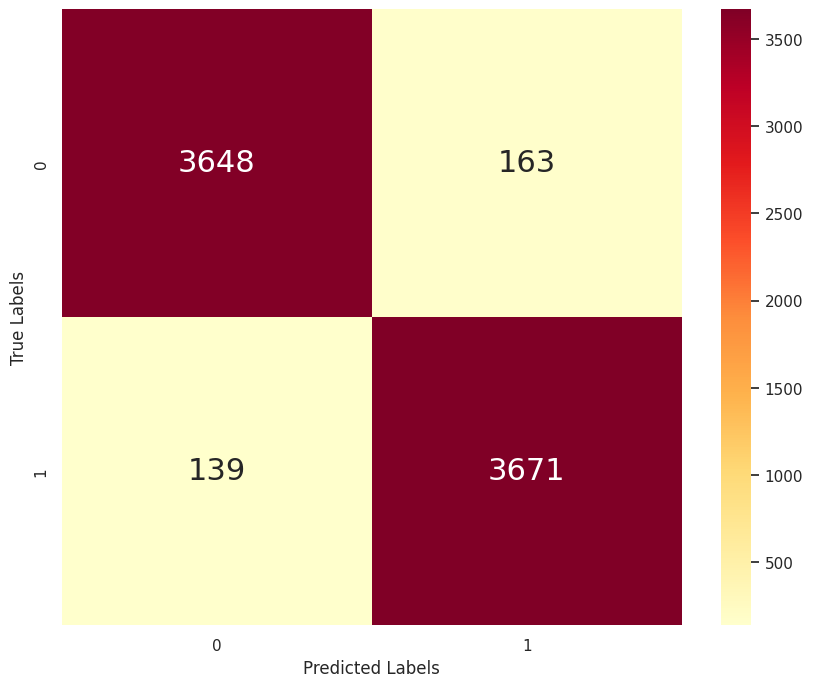

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_dataframe' is your DataFrame
X = merged_beta_gamma_katz_a_c.iloc[:, :-1]
y = merged_beta_gamma_katz_a_c.iloc[:, -1]

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost
start_time = time.time()
xgb_classifier = XGBClassifier()
xgb_predictions = cross_val_predict(xgb_classifier, X, y_encoded, cv=KFold(n_splits=10, shuffle=True, random_state=42))
xgb_accuracy = accuracy_score(y_encoded, xgb_predictions)
xgb_precision = precision_score(y_encoded, xgb_predictions)
xgb_recall = recall_score(y_encoded, xgb_predictions)
xgb_f1 = f1_score(y_encoded, xgb_predictions)
xgb_processing_time = time.time() - start_time

# Confusion Matrix
xgb_confusion_matrix = confusion_matrix(y_encoded, xgb_predictions)

print("\nXGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Processing Time:", xgb_processing_time)
print("\nConfusion Matrix:")
print(xgb_confusion_matrix)

# Create a heatmap of the confusion matrix with a diverging color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)  # Adjust font size
sns.heatmap(xgb_confusion_matrix, annot=True, cmap="YlOrRd", fmt="d", annot_kws={"size": 22})

# plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Create a heatmap of the confusion matrix with a diverging color palette
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(xgb_confusion_matrix, annot=True, cmap="Purples", fmt="d", annot_kws={"size": 12})

# plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

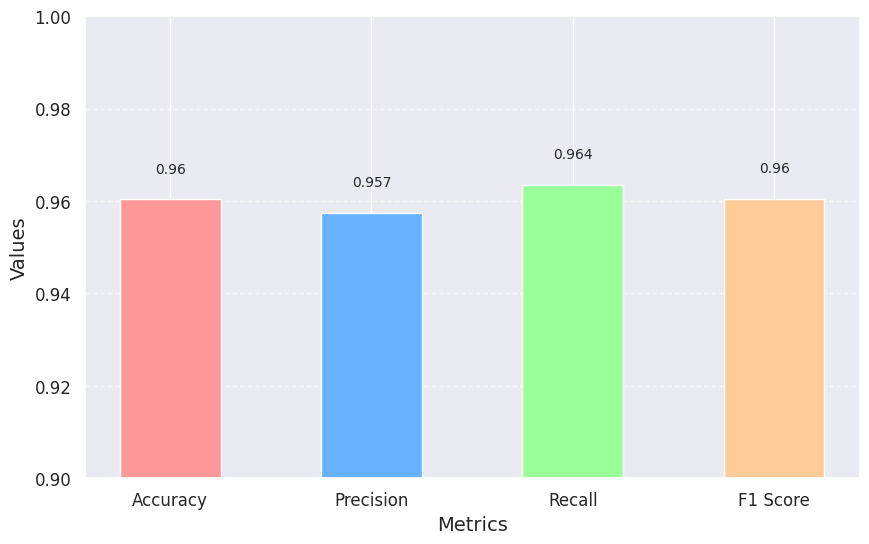

In [ ]:
import matplotlib.pyplot as plt

# XGBoost metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9603726545072825, 0.9574856546687532, 0.9635170603674541, 0.9604918890633177]

# Define beautiful colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=colors, width=0.5)

# Annotating the bars with metric values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
# plt.title('XGBoost Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.ylim(0.9, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


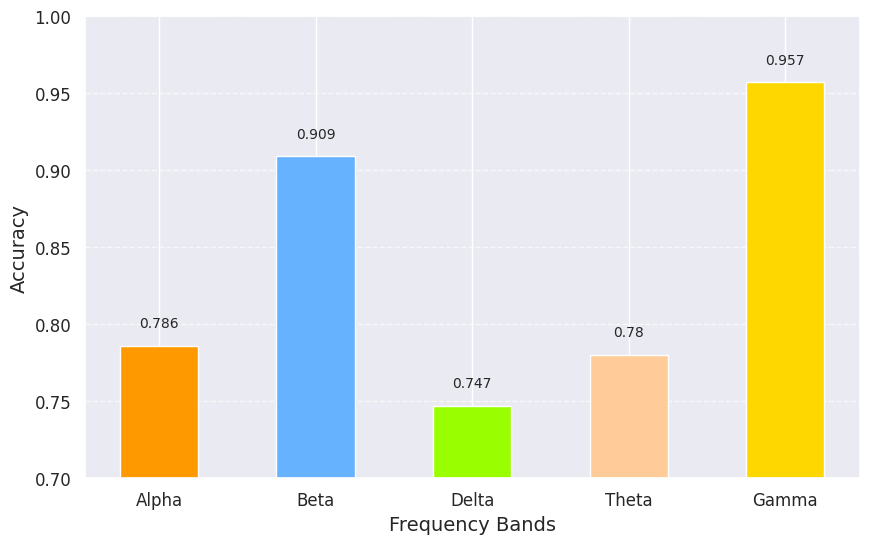

In [ ]:
import matplotlib.pyplot as plt

# Frequency bands and their corresponding accuracy values
bands = ['Alpha', 'Beta', 'Delta', 'Theta', 'Gamma']
accuracy_values = [0.786, 0.909, 0.747, 0.780, 0.957]

# Define colors for each frequency band
colors = ['#FF9900', '#66B2FF', '#99FF00', '#FFCC99', '#FFD700']

# Plotting the accuracy values
plt.figure(figsize=(10, 6))
bars = plt.bar(bands, accuracy_values, color=colors, width=0.5)

# Annotating the bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
# plt.title('XGBoost Accuracy', fontsize=16)
plt.xlabel('Frequency Bands', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.ylim(0.7, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


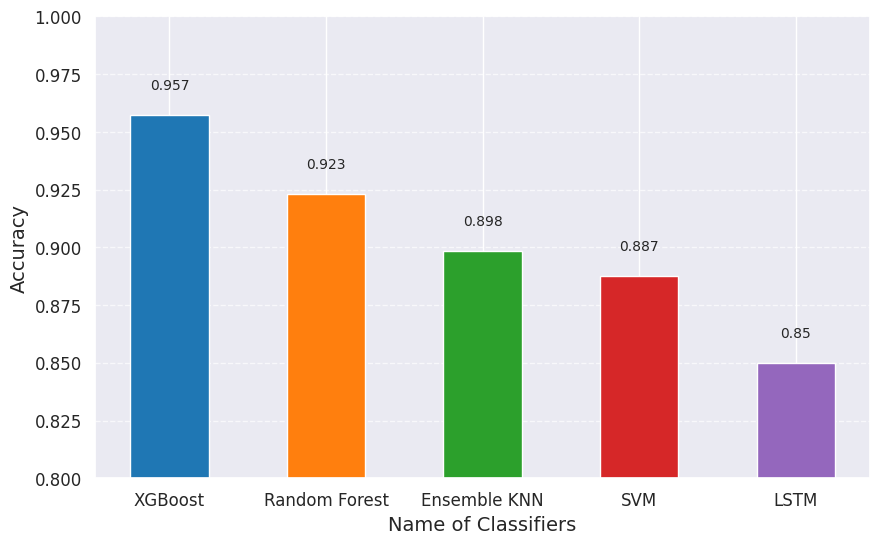

In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['XGBoost', 'Random Forest', 'Ensemble KNN', 'SVM', 'LSTM']

# Accuracy values for each classifier
accuracy_values = [0.9572234614879938, 0.9231072037790317, 0.898438525127936, 0.8874163495604251, 0.8498888900355347]

# Define colors for each classifier
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Using predefined colors from matplotlib

# Plotting the accuracy values
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracy_values, color=colors, width=0.5)

# Annotating the bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.xlabel('Name of Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
# plt.title('Accuracy Comparison of Different Classifiers', fontsize=16)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the plot
plt.ylim(0.8, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


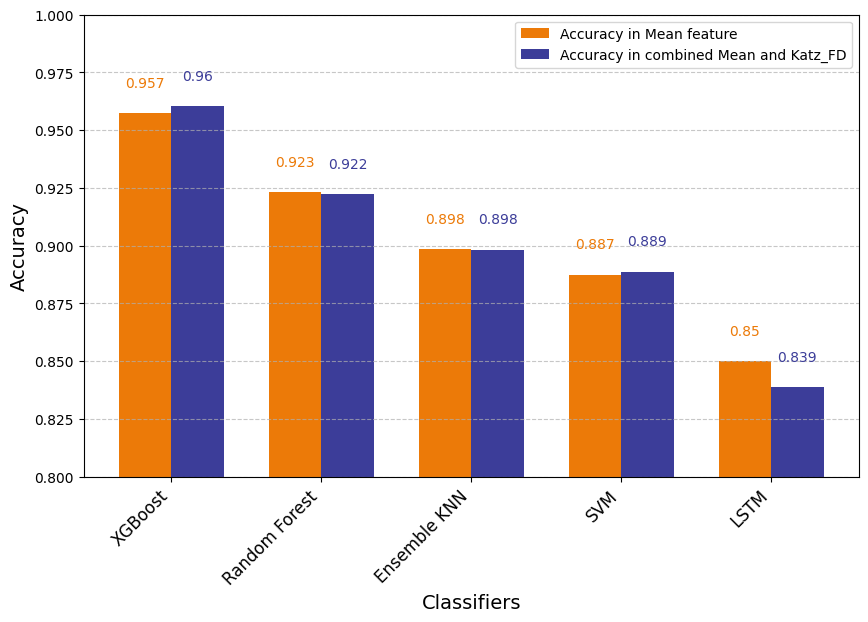

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classifiers = ['XGBoost', 'Random Forest', 'Ensemble KNN', 'SVM', 'LSTM']
accuracy_values1 = [0.9572234614879938, 0.9231072037790317, 0.898438525127936, 0.8874163495604251, 0.8498888900355347]
accuracy_values2 = [0.9603726545072825, 0.9223199055242094, 0.8983073087521323, 0.8887285133184621, 0.8388626880355552]

# Set width of bar
barWidth = 0.35

# Set position of bar on X axis
r1 = np.arange(len(accuracy_values1))
r2 = [x + barWidth for x in r1]

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_values1, color='#EC7A08', width=barWidth,  label='Accuracy in Mean feature')
plt.bar(r2, accuracy_values2, color='#3C3D99', width=barWidth,  label='Accuracy in combined Mean and Katz_FD')

# Adding labels
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks([r + barWidth/2 for r in range(len(accuracy_values1))], classifiers, rotation=45, ha='right', fontsize=12)
# plt.title('Comparative Analysis of Accuracy Values', fontsize=16)
plt.ylim(0.8, 1)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating bars with accuracy values
for i, (value1, value2) in enumerate(zip(accuracy_values1, accuracy_values2)):
    plt.text(r1[i], value1 + 0.01, round(value1, 3), ha='center', va='bottom', fontsize=10, color='#EC7A08')
    plt.text(r2[i], value2 + 0.01, round(value2, 3), ha='center', va='bottom', fontsize=10, color='#3C3D99')

# Adding legend
plt.legend()

# Show plot
plt.show()


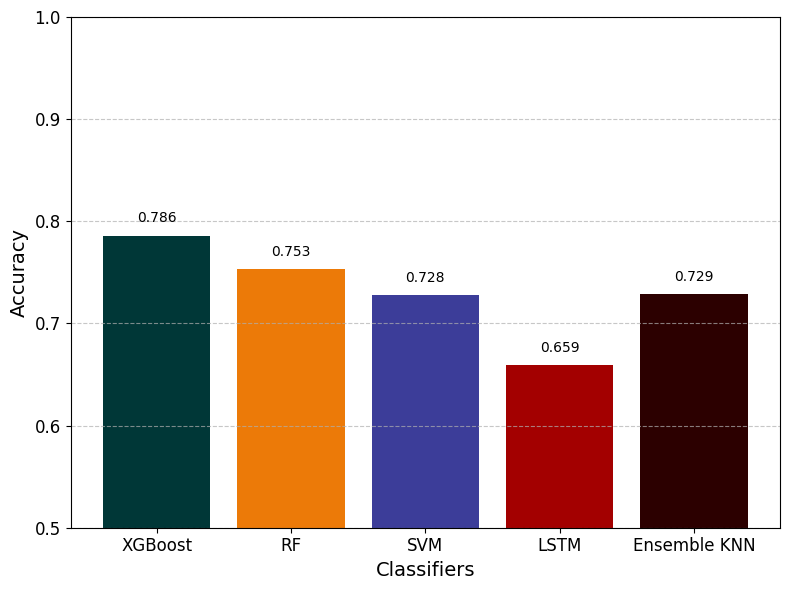

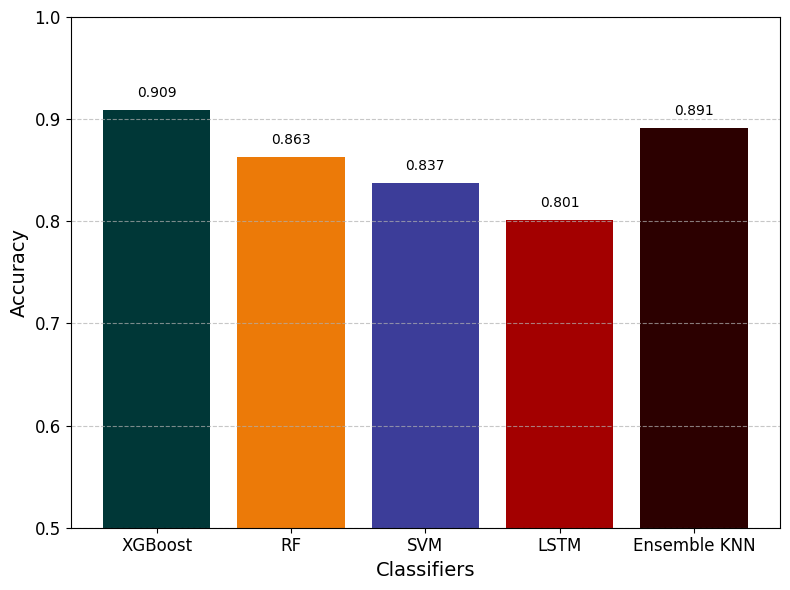

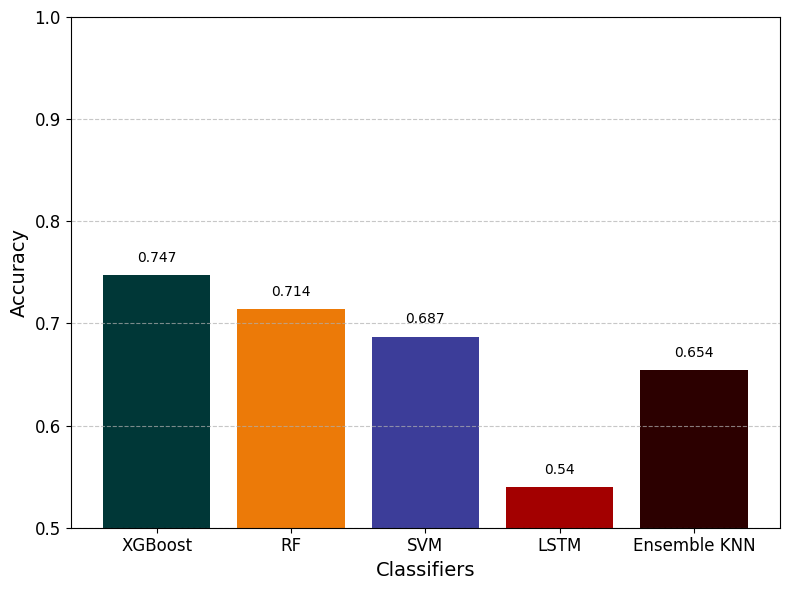

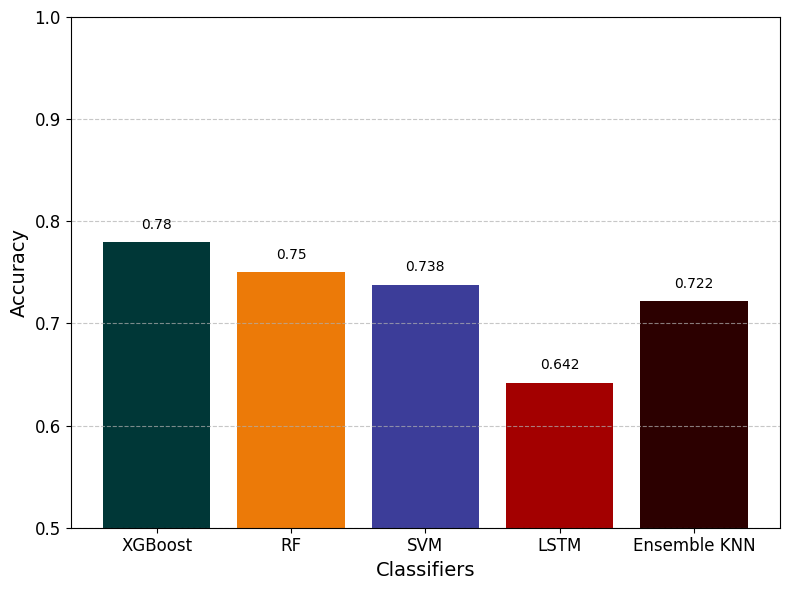

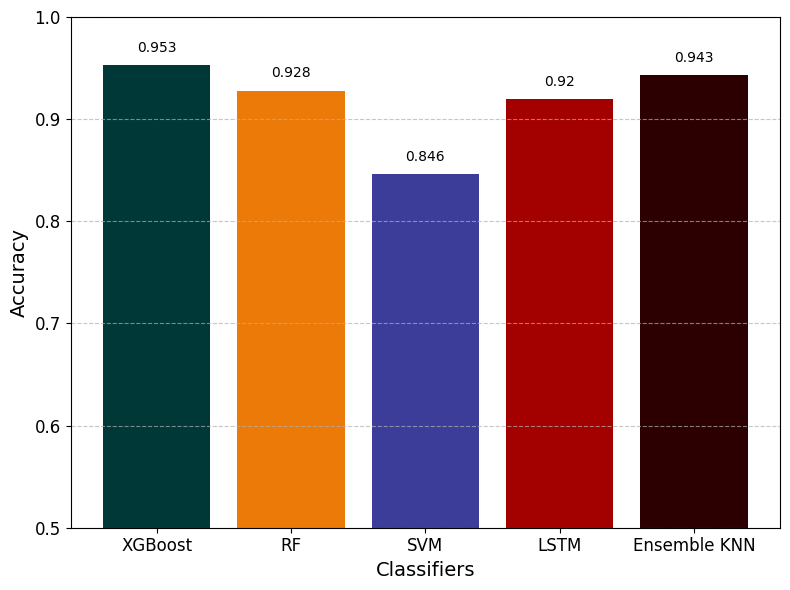

In [ ]:
import matplotlib.pyplot as plt

# Data
bands = ['Alpha', 'Beta', 'Delta', 'Theta', 'Gamma']
classifiers = ['XGBoost', 'RF', 'SVM', 'LSTM', 'Ensemble KNN']
accuracy_data = [
    [0.786, 0.753, 0.728, 0.659, 0.729],
    [0.909, 0.863, 0.837, 0.801, 0.891],
    [0.747, 0.714, 0.687, 0.540, 0.654],
    [0.780, 0.750, 0.738, 0.642, 0.722],
    [0.953, 0.928, 0.846, 0.920, 0.943]
]

# Define another set of contrasting colors for each classifier
colors = ['#003737', '#EC7A08', '#3C3D99', '#A30000', '#2C0000']

# Plotting separate bar charts for each band
for i, band in enumerate(bands):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(classifiers, accuracy_data[i], color=colors)
    plt.xlabel('Classifiers', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    # plt.title(f'Classifier Accuracy with 10-fold Cross-Validation for {band} Band', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0.5, 1)  # Adjust y-axis limit for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add accuracy values on each bar
    for bar, accuracy in zip(bars, accuracy_data[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(accuracy, 3),
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()
